# Exploratory Data Analysis - Submission 01

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

In [3]:
df = pd.read_csv('datasets/data_fillna.csv')

df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,79.466028,13517,Pave,None,IR1,Lvl,...,0,0,0,None,None,0,3,2010,WD,130500
1,544,531379050,60,RL,74.052682,11492,Pave,None,IR1,Lvl,...,0,0,0,None,None,0,4,2009,WD,220000
2,153,535304180,20,RL,64.509153,7922,Pave,None,Reg,Lvl,...,0,0,0,None,None,0,1,2010,WD,109000
3,318,916386060,60,RL,69.534877,9802,Pave,None,Reg,Lvl,...,0,0,0,None,None,0,4,2010,WD,174000
4,255,906425045,50,RL,81.385427,14235,Pave,None,IR1,Lvl,...,0,0,0,None,None,0,3,2010,WD,138500


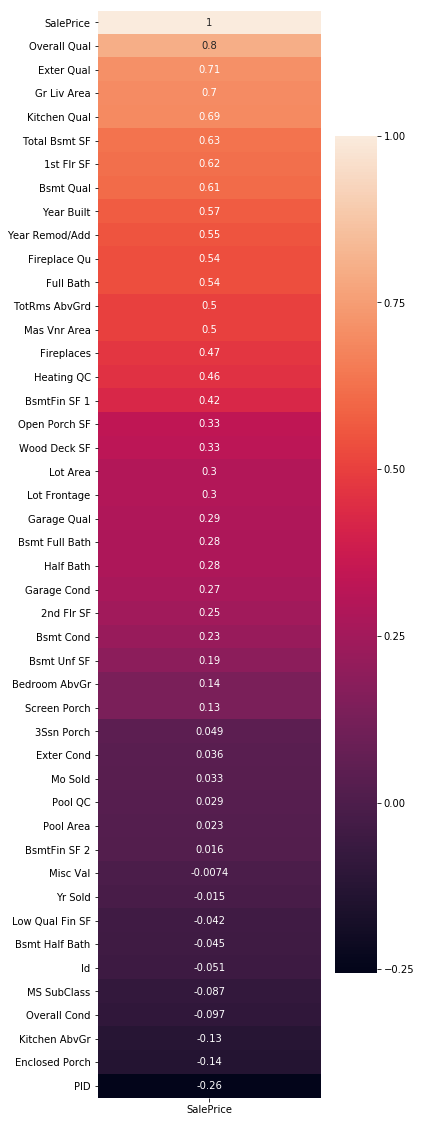

In [8]:
plt.figure(figsize=(5,20))
sns.heatmap(df.corr()[['SalePrice']].sort_values('SalePrice',ascending=False),annot=True)

## First Attempt and Baseline hypothesis:
We are going to take the highest correltions here `'Overall Qual'`, `'Exter Qual'` and `'Gr Liv Area'`  and create a linear moddel with them.

In [14]:
X = df[['Overall Qual', 'Exter Qual', 'Gr Liv Area']]
features = X.columns
y = df['SalePrice']
lr = LinearRegression()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [16]:
cross_val_score(lr, X_train, y_train, cv=5).mean()

0.7510517515900583

In [17]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
lr.score(X_train,y_train)

0.7534020201939172

In [19]:
lr.score(X_test,y_test)

0.7658532046525199

In [37]:
def create_submission(model=lr,feat=features,test_name='sub_01'):
    test = pd.read_csv('./datasets/test_fillna.csv')
    
    X_test = test[feat]
#     print(X_test.head())
#     print(X_test.columns)
    y_hat = model.predict(X_test)
#     print(y_hat)
    
    test['SalePrice'] = y_hat
    submission = test[['Id','SalePrice']]
#     print(submission.head())
    
    submission.to_csv(f'./datasets/{test_name}.csv',index=False)
    return submission.shape

In [39]:
create_submission(lr,features,'sub_01')

(879, 2)